### Analysis
#### - Urban areas have a higher ride volume the suburban and rural areas but the avg fare is much lower.
#### - Urban areas had more rides, drivers and fares than suburban and rural areas. Hypothesis is that this is due to higher demand from larger populations. Suggest doing a correlation analysis with population to confirm.
#### - Urban areas had a large variance in number of drivers. Suggest further analysis on urban cities with lower than average driver count to determine if additional drivers would increase ride volume and/or average fare.

In [147]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns


In [148]:
# read in files and create df
ride_data = os.path.join("raw_data", "ride_data.csv")
city_data = os.path.join("raw_data", "city_data.csv")

ride_data_df = pd.read_csv(ride_data)
city_data_df = pd.read_csv(city_data)

In [149]:
city_index_df = city_data_df.set_index('city')
#city_index_df

In [150]:
# Merge the two datasets on "City" 
combined_data_df = pd.merge(ride_data_df, city_data_df, on='city', how='inner')
combined_final = pd.DataFrame(combined_data_df)
combined_final.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [151]:
def type_int(type_val):
    if type_val=='Urban':
        return 1
    elif type_val=="Suburban":
        return 2
    else:
        return 3

combined_data_df['type_int'] = combined_data_df['type'].apply(type_int)
#combined_data_df

In [152]:
ride_data = combined_data_df.set_index('ride_id')
ride_data.head()

,city,date,fare,driver_count,type,type_int
ride_id,,,,,,
5403689035038,Sarabury,2016-01-16 13:49:27,38.35,46,Urban,1
7546681945283,Sarabury,2016-07-23 07:42:44,21.76,46,Urban,1
4932495851866,Sarabury,2016-04-02 04:32:25,38.03,46,Urban,1
6711035373406,Sarabury,2016-06-23 05:03:41,26.82,46,Urban,1
6388737278232,Sarabury,2016-09-30 12:48:34,30.30,46,Urban,1


In [153]:
def type_str(type_n):
    if type_n==1:
        return 'Urban'
    elif type_n==2:
        return 'Suburban'
    else:
        return 'Rural'

city_groups_df = pd.DataFrame(ride_data.groupby(['city'])['fare'].mean())
city_groups_df['Total Rides'] = ride_data.groupby(['city'])['fare'].count()
city_groups_df['Total Drivers'] = ride_data.groupby(['city'])['driver_count'].mean()
city_groups_df['City Type Int'] = ride_data.groupby(['city'])['type_int'].mean()
city_groups_df['City Type'] = city_groups_df['City Type Int'].apply(type_str)



city_groups_df = city_groups_df.rename(columns={"fare":"Avg Fare"})
city_groups_df = city_groups_df.round(2)
city_groups_df.head()

,Avg Fare,Total Rides,Total Drivers,City Type Int,City Type
city,,,,,
Alvarezhaven,23.93,31,21,1,Urban
Alyssaberg,20.61,26,67,1,Urban
Anitamouth,37.32,9,16,2,Suburban
Antoniomouth,23.62,22,21,1,Urban
Aprilchester,21.98,19,49,1,Urban


In [212]:
def type_color(type_c):
    if type_c==1:
        return '#ff7f50'
    elif type_c==2:
        return '#87CEFA'
    else:
        return '#ffd700'
    
city_groups_df['City Color'] = city_groups_df['City Type Int'].apply(type_color)

city_groups_df.head(20)

,Avg Fare,Total Rides,Total Drivers,City Type Int,City Type,City Color
city,,,,,,
Alvarezhaven,23.93,31,21,1,Urban,#ff7f50
Alyssaberg,20.61,26,67,1,Urban,#ff7f50
Anitamouth,37.32,9,16,2,Suburban,#87CEFA
Antoniomouth,23.62,22,21,1,Urban,#ff7f50
Aprilchester,21.98,19,49,1,Urban,#ff7f50
Arnoldview,25.11,31,41,1,Urban,#ff7f50
Campbellport,33.71,15,26,2,Suburban,#87CEFA
Carrollbury,36.61,10,4,2,Suburban,#87CEFA
Carrollfort,25.40,29,55,1,Urban,#ff7f50


average_fare = combined_data_df.groupby(['city'])['fare'].mean()
total_rides = combined_data_df.groupby(['city'])['fare'].count()
total_drivers = combined_data_df.groupby(['city'])['driver_count'].mean()
city_type = combined_data_df.groupby(['city'])['type']

summary_table = pd.DataFrame({"Avg Fare":average_fare,
                                 "Total Rides":total_rides,
                                 "Total Drivers":total_drivers,
                                 "City Type":city_type})
summary_table.head()

In [155]:
x_values = city_groups_df['Total Rides']
y_values = city_groups_df['Avg Fare']
z_values = city_groups_df['Total Drivers']
palette = city_groups_df['City Color']
legend = city_groups_df['City Type']

#colors = {"Light Coral":"#9b59b6", "Light Sky Blue":"#3498db", "Gold":"#95a5a6"}

## Bubble Plot of Ride Sharing Data

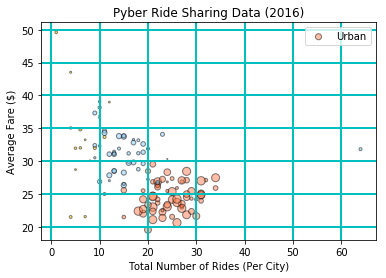

In [211]:
plt.scatter(x_values, y_values, s=z_values, c=palette, edgecolors="black",alpha=0.5)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(legend,loc='upper right')
plt.grid(color='c', linestyle='-', linewidth=2)
plt.show()

## Total Fares by City Type

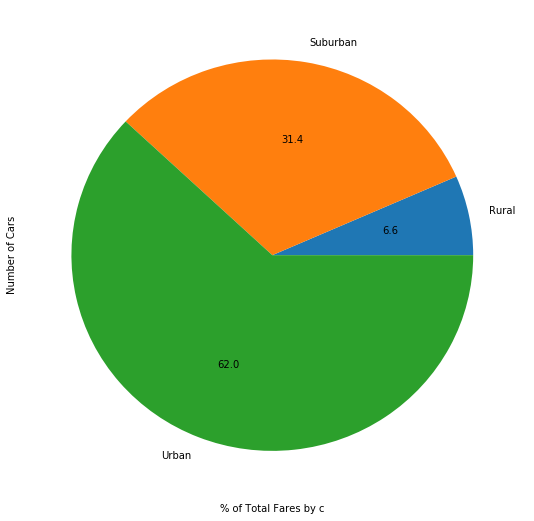

In [213]:
fare_sum = pd.DataFrame(combined_final.groupby(['type'])['fare'].sum())
fare_sum_chart = fare_sum['fare'].plot(kind='pie', autopct='%.1f', figsize=(9,9))
fare_sum_chart.set_xlabel("% of Total Fares by c")
fare_sum_chart.set_ylabel("Number of Cars")
plt.show()

## Total Rides by City Type

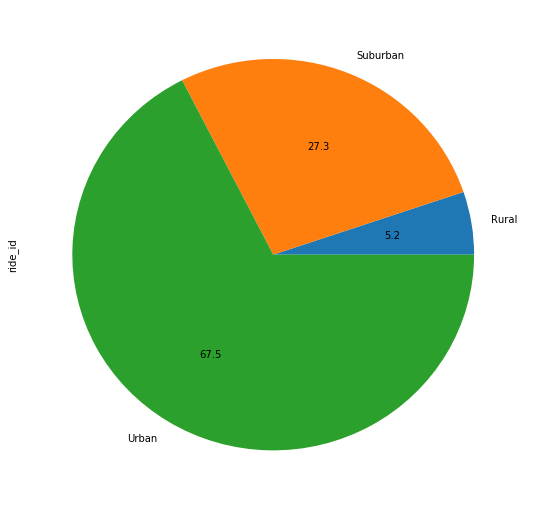

In [214]:
ride_count = pd.DataFrame(combined_final.groupby(['type'])['ride_id'].count())
ride_count_chart = ride_count['ride_id'].plot(kind='pie', autopct='%.1f', figsize=(9,9))
fare_sum_chart.set_xlabel("% of Total Rides by c")
fare_sum_chart.set_ylabel("Number of Rides")
plt.show()

## Total Drivers by City Type

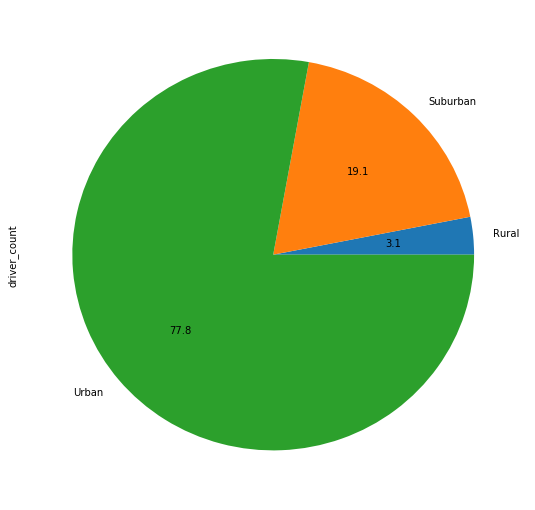

In [215]:
driver_counts = pd.DataFrame(city_data_df.groupby(['type'])['driver_count'].sum())
driver_count_chart = driver_counts['driver_count'].plot(kind='pie', autopct='%.1f', figsize=(9,9))
fare_sum_chart.set_xlabel("% of Total Rides by c")
fare_sum_chart.set_ylabel("Number of Rides")
plt.show()
